In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import math

{'1110': 276, '1000': 230, '0010': 258, '1011': 260}


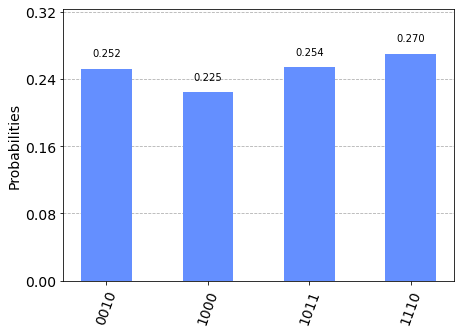

In [2]:
bx = 3
by = 4
cn = 4
qx = QuantumRegister(bx, "xq")
qy = QuantumRegister(by, "yq")
c = ClassicalRegister(cn)
qc = QuantumCircuit(qx, qy, c)


for i in range(bx):
    qc.h(qx[i])

qc.x(qy[3])
qc.cx(qx[2], qy[1])
qc.cx(qx[2], qy[2])
qc.cx(qx[1], qy[1])
qc.cx(qx[1], qy[3])
qc.ccx(qx[1], qx[2], qy[0])
qc.ccx(qx[1], qx[2], qy[1])
qc.ccx(qx[1], qx[2], qy[2])
qc.ccx(qx[1], qx[2], qy[3])

qc.measure(qy, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

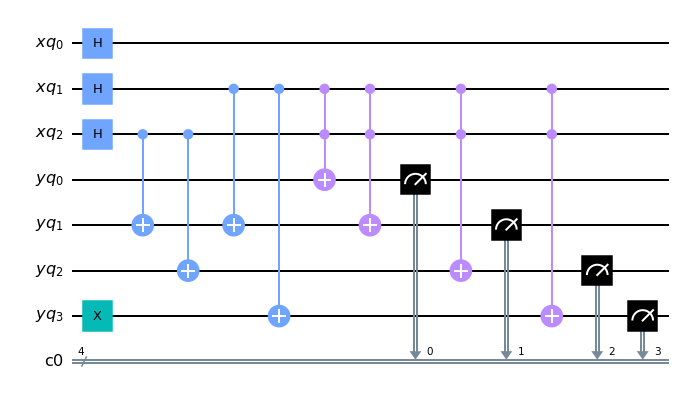

In [3]:
qc.draw(output='mpl')